# Bibliotecas necessarias

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Carregando os dados

In [2]:
raw_data_path = '../data/raw/historical_stock_data.csv'

stock_data = pd.read_csv(raw_data_path, index_col=0)

In [3]:
stock_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1962-01-02 00:00:00+00:00,0.046733,0.263021,0.270182,0.263021,0.263021,806400
1,1962-01-03 00:00:00+00:00,0.045692,0.257161,0.259115,0.253255,0.259115,1574400
2,1962-01-04 00:00:00+00:00,0.046039,0.259115,0.261068,0.257813,0.257813,844800
3,1962-01-05 00:00:00+00:00,0.044998,0.253255,0.262370,0.252604,0.259115,1420800
4,1962-01-08 00:00:00+00:00,0.044535,0.250651,0.251302,0.245768,0.251302,2035200


In [4]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data['Date'] = stock_data['Date'].dt.date

print('Estrutura do DataFrame após conversão da data:')
print(stock_data.head())

Estrutura do DataFrame após conversão da data:
         Date  Adj Close     Close      High       Low      Open   Volume
0  1962-01-02   0.046733  0.263021  0.270182  0.263021  0.263021   806400
1  1962-01-03   0.045692  0.257161  0.259115  0.253255  0.259115  1574400
2  1962-01-04   0.046039  0.259115  0.261068  0.257813  0.257813   844800
3  1962-01-05   0.044998  0.253255  0.262370  0.252604  0.259115  1420800
4  1962-01-08   0.044535  0.250651  0.251302  0.245768  0.251302  2035200


# Verificando e Removendo Valores Nulos

In [5]:
print('Valores ausentes por coluna:\n', stock_data.isna().sum())

stock_data = stock_data.dropna()

Valores ausentes por coluna:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Representações Gráficas

Visualização da série temporal

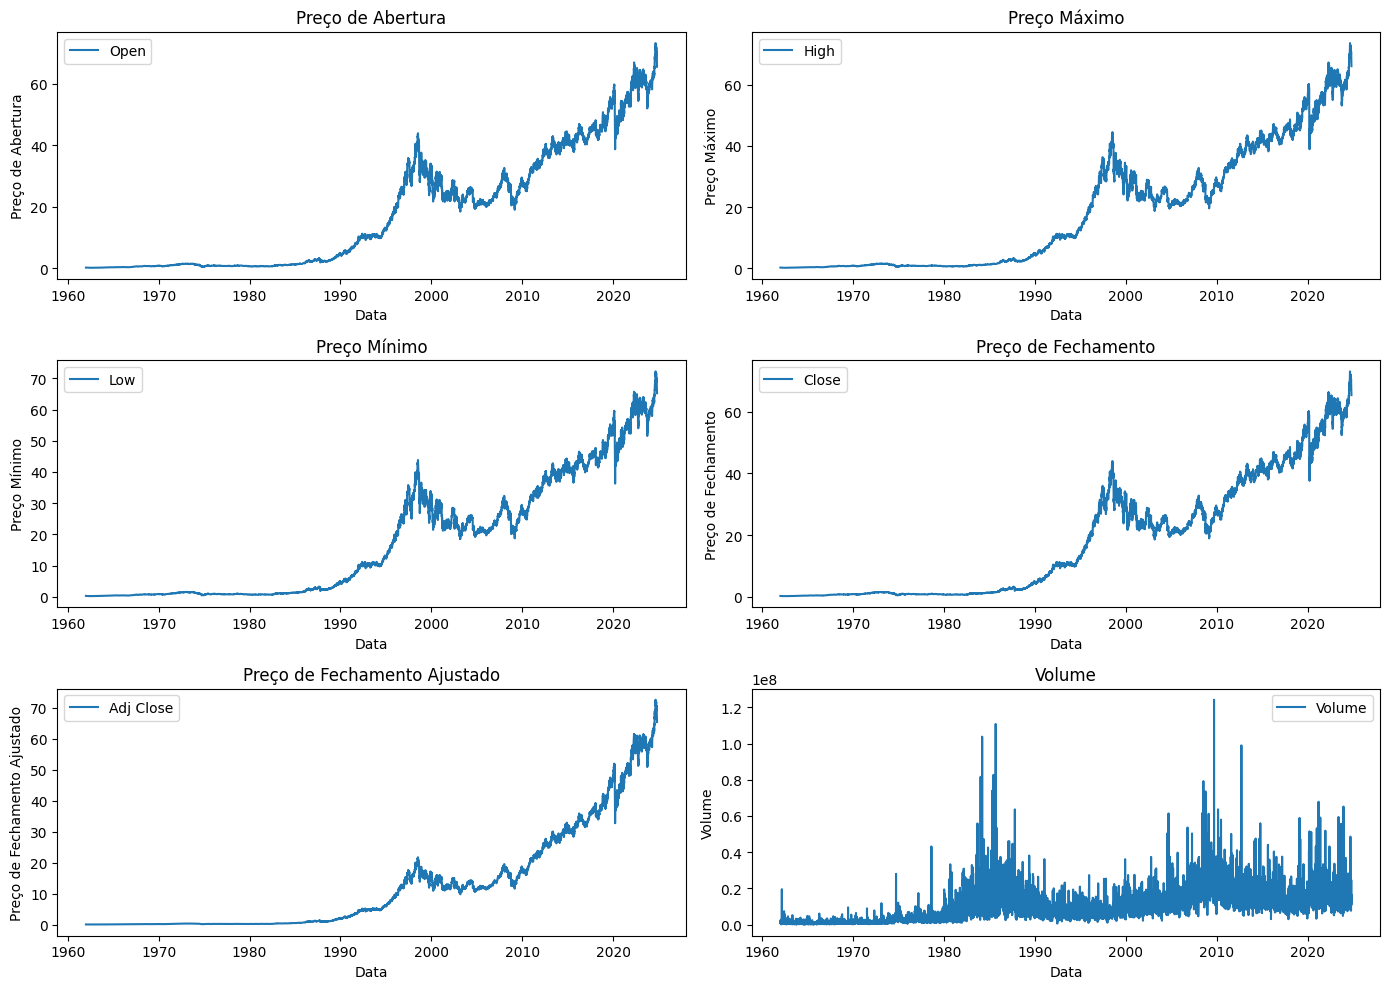

In [6]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(stock_data['Date'], stock_data['Open'], label='Open')
plt.title('Preço de Abertura')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(stock_data['Date'], stock_data['High'], label='High')
plt.title('Preço Máximo')
plt.xlabel('Data')
plt.ylabel('Preço Máximo')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(stock_data['Date'], stock_data['Low'], label='Low')
plt.title('Preço Mínimo')
plt.xlabel('Data')
plt.ylabel('Preço Mínimo')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(stock_data['Date'], stock_data['Close'], label='Close')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close')
plt.title('Preço de Fechamento Ajustado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(stock_data['Date'], stock_data['Volume'], label='Volume')
plt.title('Volume')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

Distribuição dos Dados

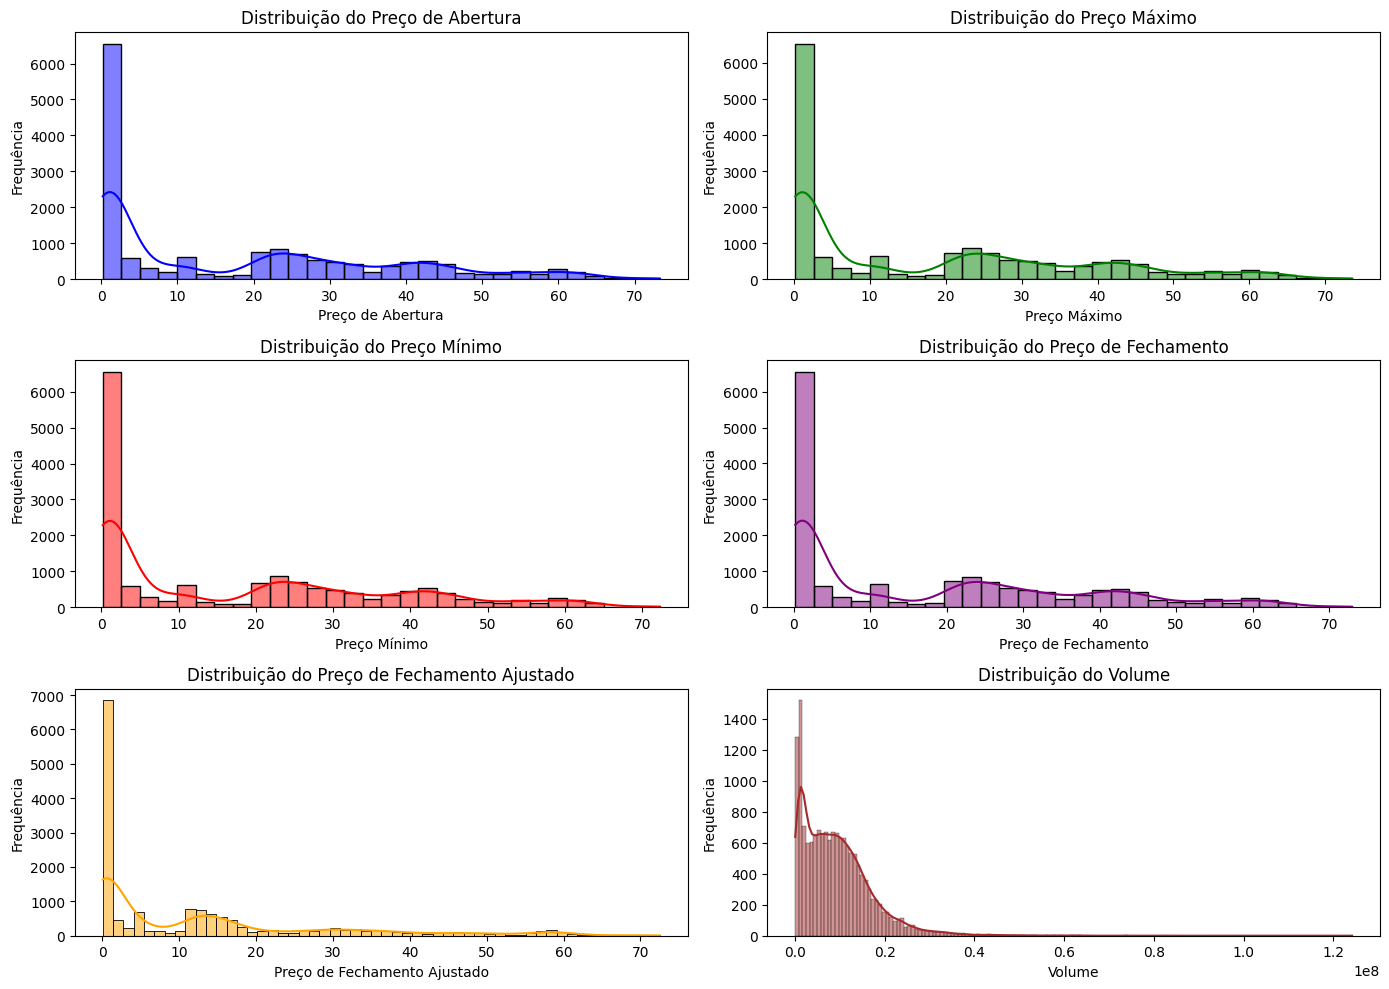

In [7]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(stock_data, x='Open', kde=True, color='blue')
plt.title('Distribuição do Preço de Abertura')
plt.xlabel('Preço de Abertura')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
sns.histplot(stock_data, x='High', kde=True, color='green')
plt.title('Distribuição do Preço Máximo')
plt.xlabel('Preço Máximo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 3)
sns.histplot(stock_data, x='Low', kde=True, color='red')
plt.title('Distribuição do Preço Mínimo')
plt.xlabel('Preço Mínimo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
sns.histplot(stock_data, x='Close', kde=True, color='purple')
plt.title('Distribuição do Preço de Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

plt.subplot(3, 2, 5)
sns.histplot(stock_data, x='Adj Close', kde=True, color='orange')
plt.title('Distribuição do Preço de Fechamento Ajustado')
plt.xlabel('Preço de Fechamento Ajustado')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
sns.histplot(stock_data, x='Volume', kde=True, color='brown')
plt.title('Distribuição do Volume')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise de Autocorrelação e Autocorrelação Parcial

<Figure size 1400x700 with 0 Axes>

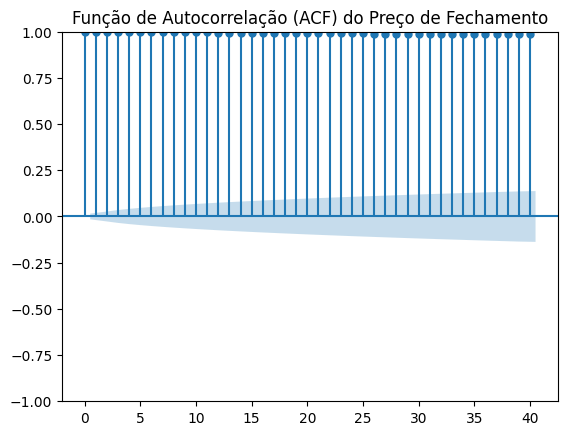

<Figure size 1400x700 with 0 Axes>

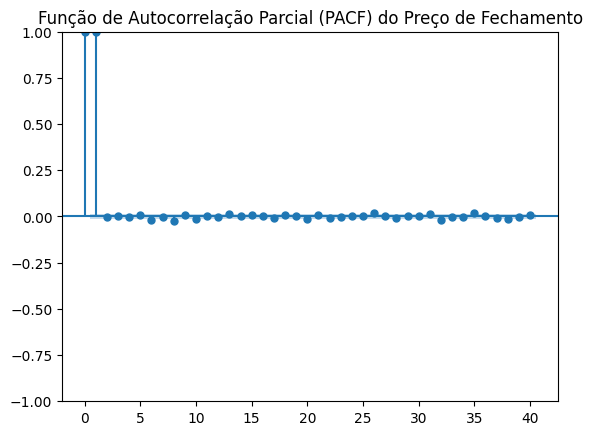

In [8]:
# Autocorrelação
plt.figure(figsize=(14, 7))
plot_acf(stock_data['Close'], lags=40)
plt.title('Função de Autocorrelação (ACF) do Preço de Fechamento')
plt.show()

# Autocorrelação Parcial
plt.figure(figsize=(14, 7))
plot_pacf(stock_data['Close'], lags=40)
plt.title('Função de Autocorrelação Parcial (PACF) do Preço de Fechamento')
plt.show()

# Normalizando os dados

In [9]:
# Normalizando as colunas numéricas, exceto a coluna 'Date'
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
stock_data[numeric_columns] = scaler.fit_transform(stock_data[numeric_columns])

# Verificar a estrutura do DataFrame para garantir que a normalização foi aplicada
print('Estrutura do DataFrame Normalizado:')
print(stock_data.head())

# Caminho para salvar o arquivo normalizado
processed_data_path = '../data/processed'
os.makedirs(processed_data_path, exist_ok=True)

# Salvar o DataFrame normalizado em CSV
stock_data.to_csv(
    os.path.join(processed_data_path, 'normalized_stock_data.csv'), index=False
)

Estrutura do DataFrame Normalizado:
         Date  Adj Close     Close      High       Low      Open    Volume
0  1962-01-02   0.000167  0.000975  0.001048  0.001120  0.000962  0.005879
1  1962-01-03   0.000153  0.000894  0.000897  0.000985  0.000908  0.012068
2  1962-01-04   0.000158  0.000921  0.000923  0.001048  0.000891  0.006189
3  1962-01-05   0.000143  0.000840  0.000941  0.000976  0.000908  0.010831
4  1962-01-08   0.000137  0.000805  0.000790  0.000881  0.000801  0.015782


# Representação gráfica da Série Temporal Normalizada

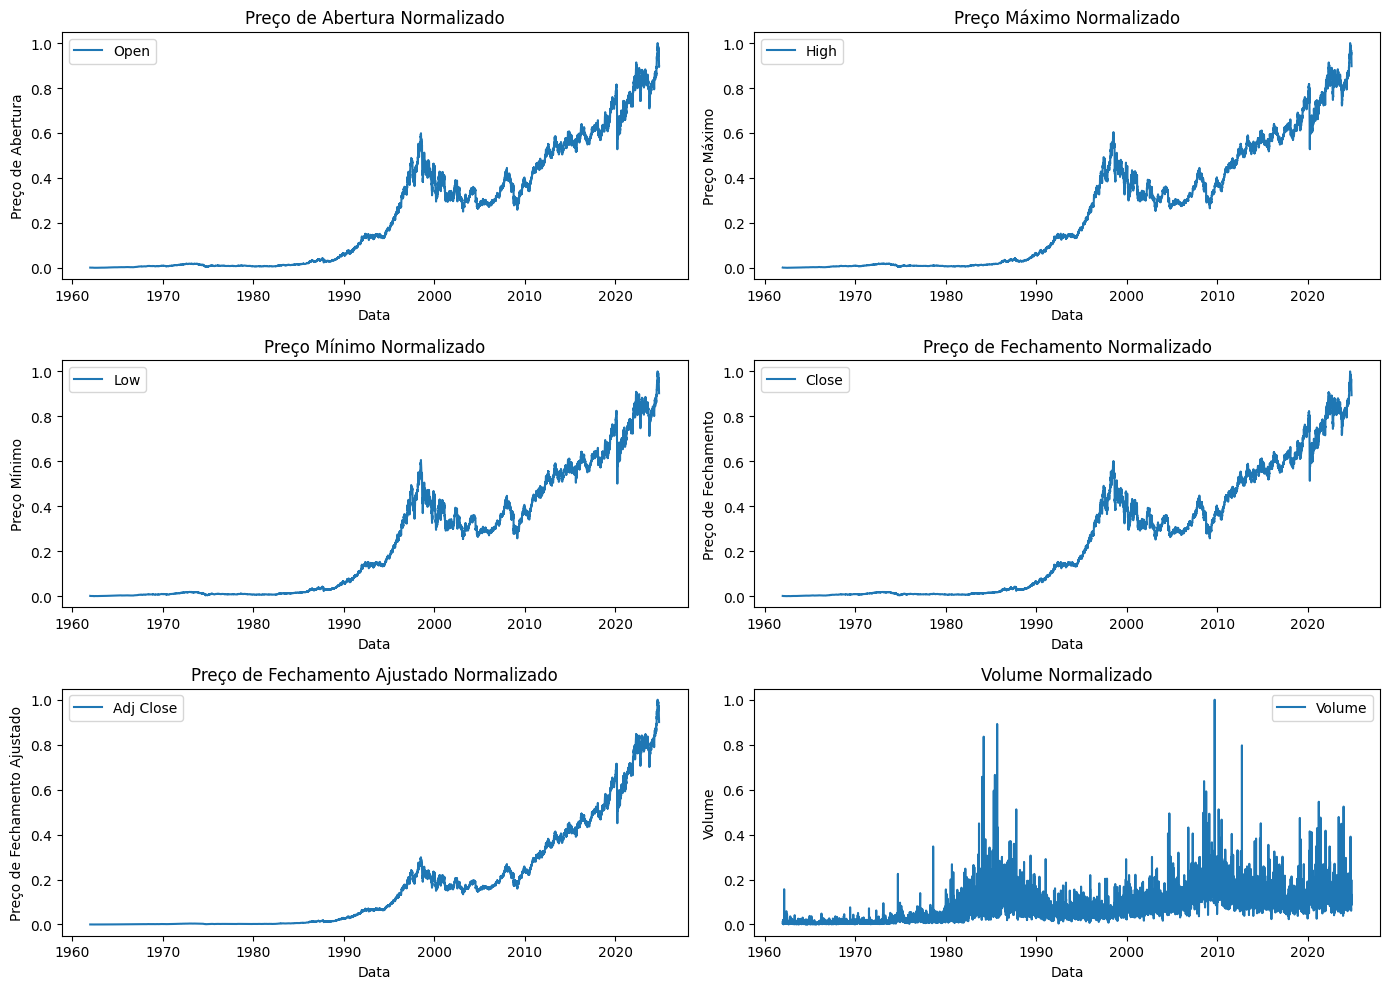

In [10]:
# Plotando a série temporal normalizada
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(stock_data['Date'], stock_data['Open'], label='Open')
plt.title('Preço de Abertura Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(stock_data['Date'], stock_data['High'], label='High')
plt.title('Preço Máximo Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço Máximo')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(stock_data['Date'], stock_data['Low'], label='Low')
plt.title('Preço Mínimo Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço Mínimo')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(stock_data['Date'], stock_data['Close'], label='Close')
plt.title('Preço de Fechamento Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close')
plt.title('Preço de Fechamento Ajustado Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(stock_data['Date'], stock_data['Volume'], label='Volume')
plt.title('Volume Normalizado')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Distribuição dos dados normalizados

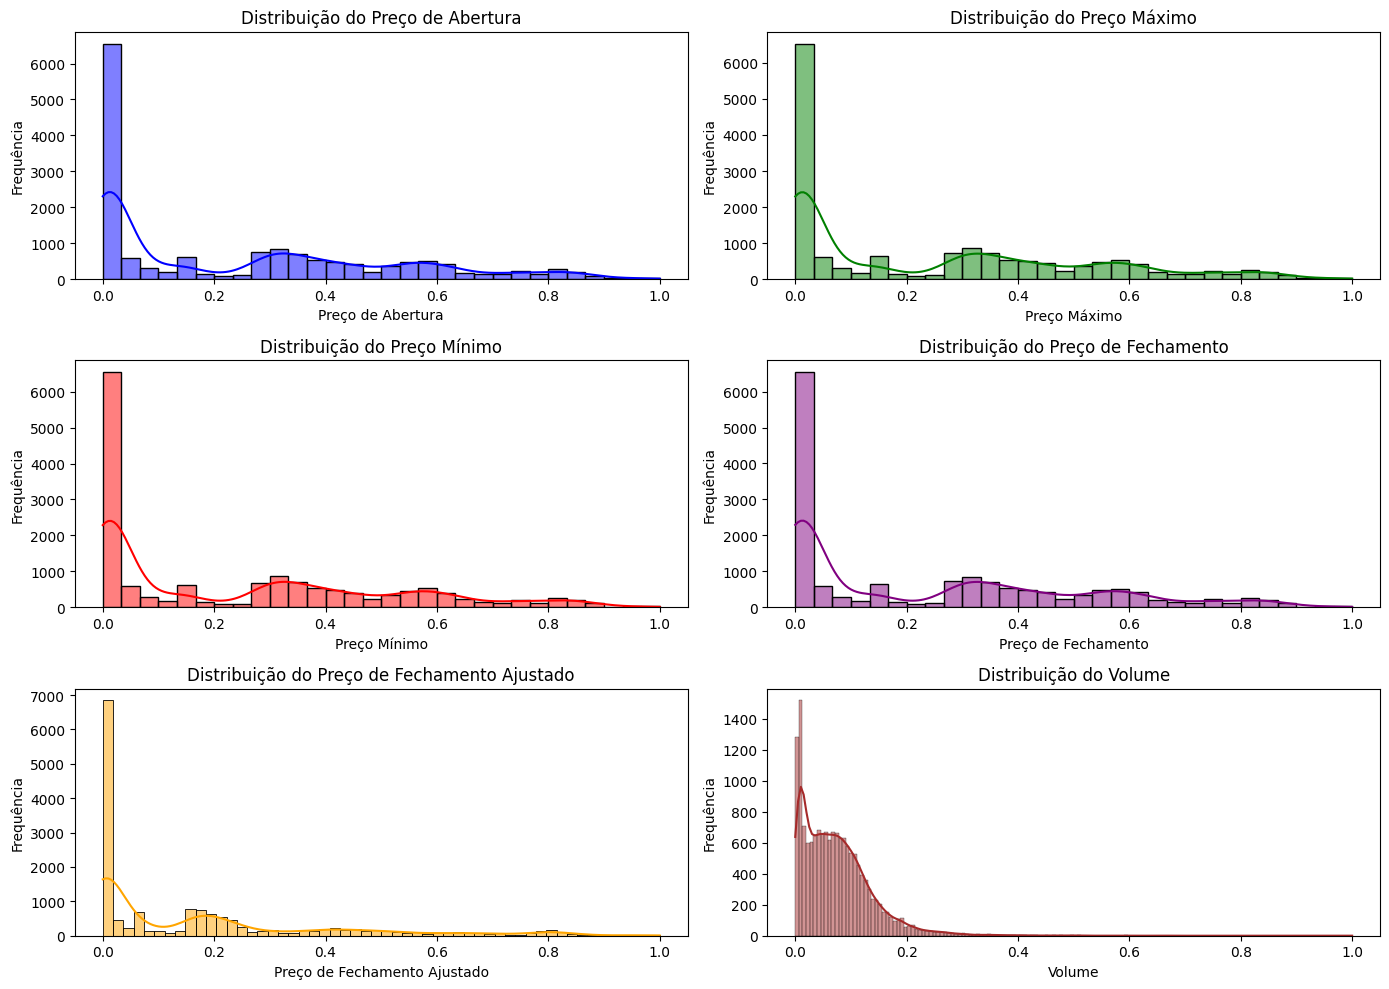

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(stock_data, x='Open', kde=True, color='blue')
plt.title('Distribuição do Preço de Abertura')
plt.xlabel('Preço de Abertura')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
sns.histplot(stock_data, x='High', kde=True, color='green')
plt.title('Distribuição do Preço Máximo')
plt.xlabel('Preço Máximo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 3)
sns.histplot(stock_data, x='Low', kde=True, color='red')
plt.title('Distribuição do Preço Mínimo')
plt.xlabel('Preço Mínimo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
sns.histplot(stock_data, x='Close', kde=True, color='purple')
plt.title('Distribuição do Preço de Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

plt.subplot(3, 2, 5)
sns.histplot(stock_data, x='Adj Close', kde=True, color='orange')
plt.title('Distribuição do Preço de Fechamento Ajustado')
plt.xlabel('Preço de Fechamento Ajustado')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
sns.histplot(stock_data, x='Volume', kde=True, color='brown')
plt.title('Distribuição do Volume')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise de Autocorrelação e Autocorrelação Parcial dos Dados Normalizados


<Figure size 1400x700 with 0 Axes>

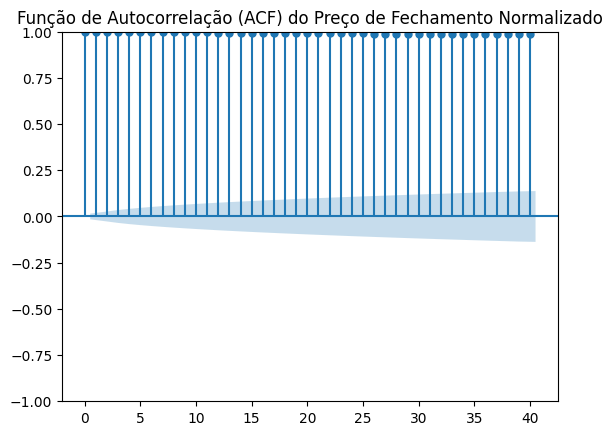

<Figure size 1400x700 with 0 Axes>

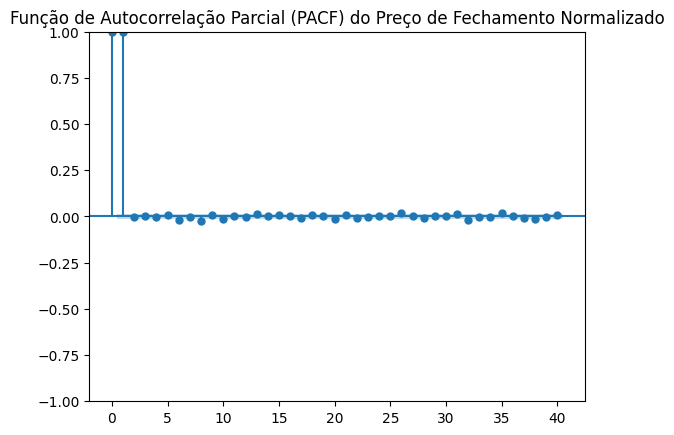

In [12]:
plt.figure(figsize=(14, 7))
plot_acf(stock_data['Close'], lags=40)
plt.title('Função de Autocorrelação (ACF) do Preço de Fechamento Normalizado')
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(stock_data['Close'], lags=40)
plt.title('Função de Autocorrelação Parcial (PACF) do Preço de Fechamento Normalizado')
plt.show()